In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
test = pd.read_csv("pml-testing.csv")
train = pd.read_csv("pml-training.csv")
train.head()

/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [2]:
train.shape

(19622, 160)

In [3]:
train2 = train.drop(['Unnamed: 0', 'user_name','raw_timestamp_part_1','raw_timestamp_part_2','cvtd_timestamp','new_window','num_window'], axis=1)
train2.shape

(19622, 153)

In [4]:
train2 = train2.dropna(axis=1, how='any')
train2.shape

(19622, 53)

In [5]:
train2.columns

Index(['roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forea

In [6]:
test = test[['roll_belt','pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forearm_z']]

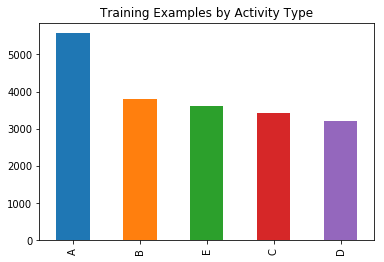

In [7]:
# Show how many training examples exist for each of the six activities
train2['classe'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')
plt.show()
# Better understand how the recordings are spread across the different
# users who participated in the study+

In [8]:
msk = np.random.rand(len(train2)) < 0.8
train_df = train2[msk]
test_df = train2[~msk]

In [9]:
nparray_train = train_df.values
nparray_test = test_df.values
nparray_train.shape
nparray_test.shape

(3903, 53)

In [10]:
train_label = nparray_train[:,52]
test_label = nparray_test[:,52]
train_feature = nparray_train[:, 0:52]
test_feature = nparray_test[:, 0:52]

In [25]:
from sklearn import preprocessing
# 正規化
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_feature=minmax_scale.fit_transform(train_feature)
test_feature=minmax_scale.fit_transform(test_feature)

/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
from sklearn import preprocessing
# 標準化
scaler = preprocessing.StandardScaler()
train_feature = scaler.fit_transform(train_feature)
test_feature = scaler.fit_transform(test_feature)

### 使用隨機深林分類器進行模型訓練以及預測分析

In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RFC = RandomForestClassifier()
RFC.fit(train_feature,train_label)
print('The accuracy of RandomForest is', RFC.score(test_feature,test_label))
print(RFC.predict(test))
RFC_pred = RFC.predict(test_feature)
# no 正規化 ： 0.9910
#　have 正規化 ：0.7323
#　have 標準化 ：0.9353



/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of RandomForest is 0.9900076863950807
['B' 'A' 'B' 'A' 'A' 'E' 'D' 'B' 'A' 'A' 'B' 'C' 'B' 'A' 'E' 'E' 'A' 'B'
 'B' 'B']


In [12]:
#輸出隨機森林分類器在測試集上的分類準確性，以及更加詳細的精確率、召回率、F1指標
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, RFC_pred))
print(classification_report(test_label, RFC_pred))

[[1129    0    0    0    1]
 [   6  736    4    0    0]
 [   0    2  709    4    0]
 [   0    2   11  588    3]
 [   0    0    2    4  702]]
              precision    recall  f1-score   support

           A       0.99      1.00      1.00      1130
           B       0.99      0.99      0.99       746
           C       0.98      0.99      0.98       715
           D       0.99      0.97      0.98       604
           E       0.99      0.99      0.99       708

   micro avg       0.99      0.99      0.99      3903
   macro avg       0.99      0.99      0.99      3903
weighted avg       0.99      0.99      0.99      3903



### 使用梯度提升決策樹進行整合模型的訓練以及預測分析

In [13]:
GBC = GradientBoostingClassifier()
GBC.fit(train_feature, train_label)
print('The accuracy of GradientBoosting is',GBC.score(test_feature,test_label))
print(GBC.predict(test))
GBC_pred = GBC.predict(test_feature)
# no 正規化 ： 0.9682
# have 正規化：0.7321
# have 標準化 ：0.8586

The accuracy of GradientBoosting is 0.9697668460158853
['B' 'A' 'B' 'A' 'A' 'E' 'D' 'B' 'A' 'A' 'B' 'C' 'B' 'A' 'E' 'E' 'A' 'B'
 'B' 'B']


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, GBC_pred))
print(classification_report(test_label, GBC_pred))

[[1113   11    1    2    3]
 [  14  717   14    0    1]
 [   0   13  693    7    2]
 [   0    5   18  577    4]
 [   1    9    5    8  685]]
              precision    recall  f1-score   support

           A       0.99      0.98      0.99      1130
           B       0.95      0.96      0.96       746
           C       0.95      0.97      0.96       715
           D       0.97      0.96      0.96       604
           E       0.99      0.97      0.98       708

   micro avg       0.97      0.97      0.97      3903
   macro avg       0.97      0.97      0.97      3903
weighted avg       0.97      0.97      0.97      3903



### 使用單一決策樹進行模型訓練以及預測分析

In [15]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(train_feature, train_label)
print('The accuracy of DecisionTree is', DTC.score(test_feature,test_label))
print(DTC.predict(test))
DTC_pred = DTC.predict(test_feature)
# no 正規化 ： 0.9608
# have 正規化 ： 0.4489
# have 標準化 ：0.8175

The accuracy of DecisionTree is 0.9659236484755317
['B' 'A' 'B' 'A' 'A' 'E' 'D' 'B' 'A' 'A' 'B' 'C' 'B' 'A' 'E' 'E' 'A' 'B'
 'B' 'B']


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, DTC_pred))
print(classification_report(test_label, DTC_pred))

[[1115    8    4    2    1]
 [  15  710   10    4    7]
 [   6    7  682   17    3]
 [   3    8   10  574    9]
 [   1    5    6    7  689]]
              precision    recall  f1-score   support

           A       0.98      0.99      0.98      1130
           B       0.96      0.95      0.96       746
           C       0.96      0.95      0.96       715
           D       0.95      0.95      0.95       604
           E       0.97      0.97      0.97       708

   micro avg       0.97      0.97      0.97      3903
   macro avg       0.96      0.96      0.96      3903
weighted avg       0.97      0.97      0.97      3903



### 使用線性假設的支援向量機分類器進行模型訓練以及預測分析

In [31]:
from sklearn.svm import SVC
SVCL = SVC(kernel='linear')
SVCL.fit(train_feature, train_label)
print('The accuracy of SVM Liner is', SVCL.score(test_feature,test_label))
print(SVCL.predict(test))
SVCL_pred = SVCL.predict(test_feature)
# no 正規化 ： 0
# have 正規化 ： 0.4810
# have 標準化 ：0.7578

The accuracy of SVM Liner is 0.7609531129900077
['A' 'A' 'A' 'A' 'A' 'C' 'C' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'C' 'A' 'A' 'B'
 'A' 'A']


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, SVCL_pred))
print(classification_report(test_label, SVCL_pred))

[[991  29  62  45   3]
 [107 515  44  19  61]
 [ 63  70 539  27  16]
 [ 38  30  59 449  28]
 [ 36  77  63  56 476]]
              precision    recall  f1-score   support

           A       0.80      0.88      0.84      1130
           B       0.71      0.69      0.70       746
           C       0.70      0.75      0.73       715
           D       0.75      0.74      0.75       604
           E       0.82      0.67      0.74       708

   micro avg       0.76      0.76      0.76      3903
   macro avg       0.76      0.75      0.75      3903
weighted avg       0.76      0.76      0.76      3903



### 使用多項式 kernel 的支援向量機分類器進行模型訓練以及預測分析

In [17]:
from sklearn.svm import SVC
SVCP = SVC(kernel='poly')
SVCP.fit(train_feature, train_label)
print('The accuracy of SVM Poly is', SVCP.score(test_feature,test_label))
print(SVCP.predict(test))
SVCP_pred = SVCP.predict(test_feature)
# no 正規化 ： 0.9890
# have 正規化： 0.4285
# have 標準化 ：0.9485

/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy of SVM Poly is 0.988982833717653
['B' 'A' 'B' 'A' 'A' 'E' 'D' 'B' 'A' 'A' 'B' 'C' 'B' 'A' 'E' 'E' 'A' 'B'
 'B' 'B']


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, SVCP_pred))
print(classification_report(test_label, SVCP_pred))

[[1129    1    0    0    0]
 [   5  739    1    0    1]
 [   0    6  704    4    1]
 [   0    0    6  593    5]
 [   1    4    2    6  695]]
              precision    recall  f1-score   support

           A       0.99      1.00      1.00      1130
           B       0.99      0.99      0.99       746
           C       0.99      0.98      0.99       715
           D       0.98      0.98      0.98       604
           E       0.99      0.98      0.99       708

   micro avg       0.99      0.99      0.99      3903
   macro avg       0.99      0.99      0.99      3903
weighted avg       0.99      0.99      0.99      3903



### 使用高斯 kernel 的支援向量機分類器進行模型訓練以及預測分析

In [33]:
from sklearn.svm import SVC
SVCR = SVC(kernel='rbf')
SVCR.fit(train_feature, train_label)
print('The accuracy of SVM Rbf is', SVCR.score(test_feature,test_label))
print(SVCR.predict(test))
SVCR_pred = SVCR.predict(test_feature)
# no 正規化 ： 0.2826
# have 正規化 ： 0.6075
# have 標準化 ：0.9519

The accuracy of SVM Rbf is 0.951319497822188
['E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E'
 'E' 'E']


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, SVCR_pred))
print(classification_report(test_label, SVCR_pred))

[[1123    3    1    0    3]
 [  46  697    3    0    0]
 [   0   39  665    5    6]
 [   1    1   54  544    4]
 [   0    1   14    9  684]]
              precision    recall  f1-score   support

           A       0.96      0.99      0.98      1130
           B       0.94      0.93      0.94       746
           C       0.90      0.93      0.92       715
           D       0.97      0.90      0.94       604
           E       0.98      0.97      0.97       708

   micro avg       0.95      0.95      0.95      3903
   macro avg       0.95      0.94      0.95      3903
weighted avg       0.95      0.95      0.95      3903



### 使用 sigmoid kernel 的支援向量機分類器進行模型訓練以及預測分析

In [26]:
from sklearn.svm import SVC
SVCS = SVC(kernel='sigmoid')
SVCS.fit(train_feature, train_label)
print('The accuracy of SVM sigmoid is', SVCS.score(test_feature,test_label))
print(SVCS.predict(test))
SVCS_pred = SVCS.predict(test_feature)
# no 正規化 ： 0.1692
# have 正規化 ： 0.5611
# have 標準化 ：0.3491

/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy of SVM sigmoid is 0.5826287471176018
['E' 'A' 'A' 'A' 'C' 'E' 'E' 'C' 'C' 'B' 'A' 'E' 'E' 'A' 'B' 'A' 'E' 'A'
 'D' 'E']


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, SVCS_pred))
print(classification_report(test_label, SVCS_pred))

[[848  16  91 162  13]
 [153 243 125 143  82]
 [181  19 418  80  17]
 [ 50  13  68 436  37]
 [ 56  58 144 121 329]]
              precision    recall  f1-score   support

           A       0.66      0.75      0.70      1130
           B       0.70      0.33      0.44       746
           C       0.49      0.58      0.54       715
           D       0.46      0.72      0.56       604
           E       0.69      0.46      0.55       708

   micro avg       0.58      0.58      0.58      3903
   macro avg       0.60      0.57      0.56      3903
weighted avg       0.61      0.58      0.57      3903



### 使用高斯樸素貝葉斯(Gaussian Naive Bayes)分類器進行模型訓練以及預測分析

In [19]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
GNB = GaussianNB().fit(train_feature,train_label)
print('The accuracy of Gaussian Naive Bayes is', GNB.score(test_feature,test_label))
print(GNB.predict(test))
GNB_pred = GNB.predict(test_feature)
# no 正規化 0.49911
# have 正規化 ： 0.2847
# have 標準化 ：0.3538

The accuracy of Gaussian Naive Bayes is 0.49602869587496795
['B' 'C' 'C' 'C' 'B' 'A' 'C' 'B' 'A' 'C' 'C' 'C' 'B' 'A' 'E' 'B' 'C' 'B'
 'D' 'B']


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, GNB_pred))
print(classification_report(test_label, GNB_pred))

[[329  85 526 155  35]
 [ 27 464 146  69  40]
 [ 13  81 463 121  37]
 [  0  13 233 286  72]
 [  4 112  91 107 394]]
              precision    recall  f1-score   support

           A       0.88      0.29      0.44      1130
           B       0.61      0.62      0.62       746
           C       0.32      0.65      0.43       715
           D       0.39      0.47      0.43       604
           E       0.68      0.56      0.61       708

   micro avg       0.50      0.50      0.50      3903
   macro avg       0.58      0.52      0.50      3903
weighted avg       0.61      0.50      0.50      3903



### 使用多項式樸素貝葉斯(Multinomial Naive Bayes)分類器進行模型訓練以及預測分析

In [28]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB().fit(train_feature,train_label)
print('The accuracy of Multinomial Naive Bayes is', MNB.score(test_feature,test_label))
print(MNB.predict(test))
MNB_pred = MNB.predict(test_feature)
# 輸入不能是負數。
# have 正規化 ： 0.3304
# 標準化後，輸入依舊是負數

The accuracy of Multinomial Naive Bayes is 0.34998718934153217
['C' 'A' 'A' 'A' 'A' 'C' 'D' 'D' 'A' 'A' 'A' 'A' 'E' 'A' 'D' 'A' 'A' 'D'
 'D' 'A']


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, MNB_pred))
print(classification_report(test_label, MNB_pred))

[[984  62   1  15  68]
 [487 113   0  10 136]
 [613  40   0   2  60]
 [363 104   0  80  57]
 [427  67   5  20 189]]
              precision    recall  f1-score   support

           A       0.34      0.87      0.49      1130
           B       0.29      0.15      0.20       746
           C       0.00      0.00      0.00       715
           D       0.63      0.13      0.22       604
           E       0.37      0.27      0.31       708

   micro avg       0.35      0.35      0.35      3903
   macro avg       0.33      0.28      0.24      3903
weighted avg       0.32      0.35      0.27      3903



### 使用伯努力樸素貝葉斯(Bernoulli Naive Bayes)分類器進行模型訓練以及預測分析

In [21]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB().fit(train_feature,train_label)
print('The accuracy of Bernoulli Naive Bayes is', BNB.score(test_feature,test_label))
print(BNB.predict(test))
BNB_pred = BNB.predict(test_feature)
# no 正規化 0.4268 
# have 正規化 ： 0.2972
# have 標準化 ：0.4256

The accuracy of Bernoulli Naive Bayes is 0.4391493722777351
['B' 'A' 'A' 'A' 'A' 'E' 'C' 'D' 'A' 'A' 'A' 'A' 'B' 'A' 'E' 'B' 'A' 'B'
 'B' 'B']


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, BNB_pred))
print(classification_report(test_label, BNB_pred))

[[682 167 147  65  69]
 [159 323  73  88 103]
 [202 156 290  19  48]
 [ 40 163 131 175  95]
 [ 86 153 126  99 244]]
              precision    recall  f1-score   support

           A       0.58      0.60      0.59      1130
           B       0.34      0.43      0.38       746
           C       0.38      0.41      0.39       715
           D       0.39      0.29      0.33       604
           E       0.44      0.34      0.39       708

   micro avg       0.44      0.44      0.44      3903
   macro avg       0.43      0.42      0.42      3903
weighted avg       0.44      0.44      0.44      3903



### 使用邏輯迴歸(LogisticRegression)進行模型訓練以及預測分析

In [23]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(train_feature, train_label)
print('The accuracy of Logistic Regression is', LR.score(test_feature,test_label))
print(LR.predict(test))
LR_pred = (LR.predict(test_feature))
# no 正規化 0.7272
# have 正規化 ： 0.5621
# have 標準化 ：0.7133

/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy of Logistic Regression is 0.7389187804253139
['B' 'A' 'B' 'C' 'A' 'E' 'D' 'E' 'A' 'A' 'D' 'A' 'B' 'A' 'E' 'A' 'A' 'B'
 'B' 'B']


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, LR_pred))
print(classification_report(test_label, LR_pred))

[[1003   21   55   38   13]
 [ 106  514   52   23   51]
 [  99   68  460   54   34]
 [  50   26   70  421   37]
 [  42   78   38   64  486]]
              precision    recall  f1-score   support

           A       0.77      0.89      0.83      1130
           B       0.73      0.69      0.71       746
           C       0.68      0.64      0.66       715
           D       0.70      0.70      0.70       604
           E       0.78      0.69      0.73       708

   micro avg       0.74      0.74      0.74      3903
   macro avg       0.73      0.72      0.73      3903
weighted avg       0.74      0.74      0.74      3903



### 使用 KNN 進行模型訓練以及預測分析

In [35]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(train_feature,train_label)
print('The accuracy of KNeighbors is', KNC.score(test_feature,test_label))
print(KNC.predict(test))
KNC_pred = KNC.predict(test_feature)
# no 正規化 0.9189
# have 正規化 ： 0.9359
# have 標準化 ：0.9764

The accuracy of KNeighbors is 0.9761721752498078
['B' 'B' 'B' 'C' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'B' 'E' 'B' 'A' 'E' 'B' 'B'
 'B' 'B']


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, KNC_pred))
print(classification_report(test_label, KNC_pred))

[[1127    1    0    2    0]
 [  10  723   12    0    1]
 [   1   12  689   10    3]
 [   2    0   29  569    4]
 [   0    2    3    1  702]]
              precision    recall  f1-score   support

           A       0.99      1.00      0.99      1130
           B       0.98      0.97      0.97       746
           C       0.94      0.96      0.95       715
           D       0.98      0.94      0.96       604
           E       0.99      0.99      0.99       708

   micro avg       0.98      0.98      0.98      3903
   macro avg       0.97      0.97      0.97      3903
weighted avg       0.98      0.98      0.98      3903

